# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [2]:
year_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
year_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')

In [3]:
df = pd.concat([year_2000, year_2001], axis = 0)
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.111,2170.0,PG


# Exploratory Data Analysis

## Financial Information

In [4]:
df = df[df.revenue != 0]
df = df[df.budget != 0]

In [5]:
df['PositiveFinancialInfo'] = df['revenue'] - df['budget'] > 0
df.drop(df[df['PositiveFinancialInfo'] == False].index, inplace = True)

In [6]:
df['PositiveFinancialInfo'].value_counts()

True    213
Name: PositiveFinancialInfo, dtype: int64

## Movies per Certification Category

In [7]:
df['certification'].value_counts()

R        87
PG-13    70
PG       17
G        11
NR        5
Name: certification, dtype: int64

In [8]:
df = df[df.certification !='NR']

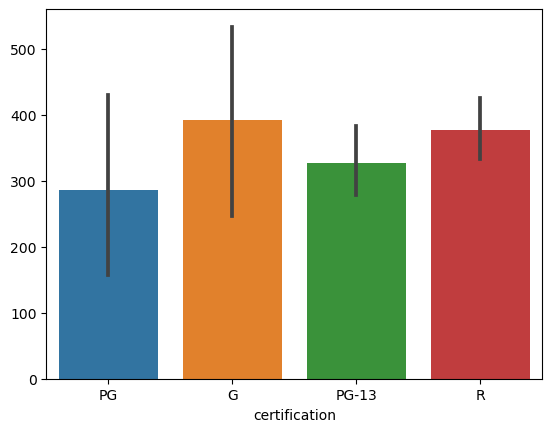

In [9]:
sns.barplot(x=df.certification,
           y=df.index)
plt.show();

## Average Revenue per Certification Category

In [10]:
df.groupby('certification')['revenue'].mean().round(5)

certification
G        1.532017e+08
PG       1.875073e+08
PG-13    1.597104e+08
R        7.757177e+07
Name: revenue, dtype: float64

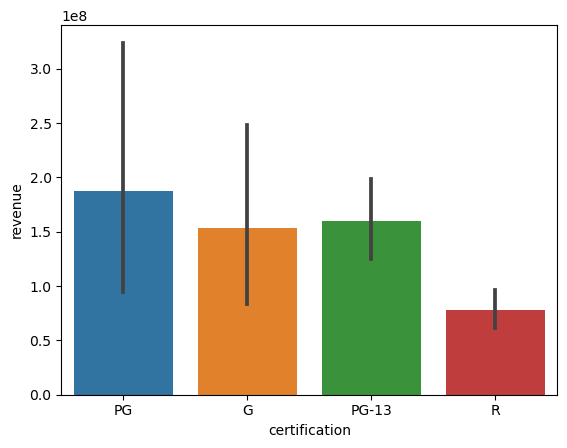

In [11]:
sns.barplot(x='certification',
           y='revenue',
           data = df)
plt.show();

## Average Budget per Certification Category

In [12]:
df.groupby('certification')['budget'].mean()

certification
G        4.654545e+07
PG       4.773529e+07
PG-13    4.854857e+07
R        2.749809e+07
Name: budget, dtype: float64

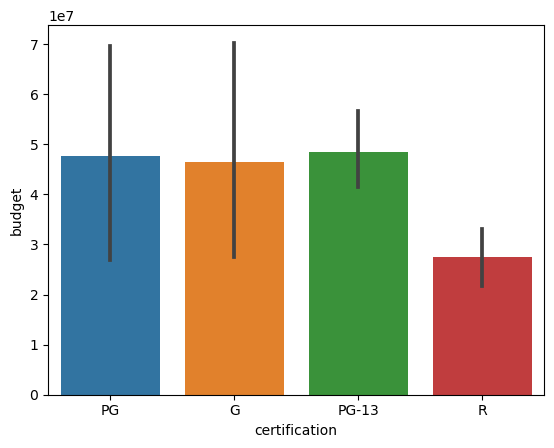

In [13]:
sns.barplot(x='certification',
           y='budget',
           data = df)
plt.show();